<a href="https://colab.research.google.com/github/mailech/SmartEnergy-Consumption/blob/Avany-Manoj/d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

def generate_data():
    print("Generating synthetic energy data...")

    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


    df = pd.DataFrame(date_rng, columns=['timestamp'])


    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])


    month = df['timestamp'].dt.month
    ac_prob = np.where(month >= 4, 0.8, 0.1)
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)


    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)

    # Other appliances
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.9, 0.1])

    # Total power
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']

    data_path = os.path.join("energy_consumption_project", "data", "raw", "energy_data.csv")
    # Create parent directories if they don't exist
    os.makedirs(os.path.dirname(data_path), exist_ok=True)
    df.to_csv(data_path, index=False)
    print(f"Data saved to {data_path}")

if __name__ == "__main__":
    generate_data()


Generating synthetic energy data...
Data saved to energy_consumption_project/data/raw/energy_data.csv


/tmp/ipython-input-2244698090.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


In [2]:
import pandas as pd

# Load data
df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Weekly energy in kWh
weekly_energy = df['total_power'].resample('W').sum() / 1000  # convert Wh to kWh

print(weekly_energy)


timestamp
2023-01-01      9.824
2023-01-08     70.431
2023-01-15     71.177
2023-01-22     65.922
2023-01-29     58.448
2023-02-05     60.695
2023-02-12     76.772
2023-02-19     76.890
2023-02-26     60.515
2023-03-05     58.649
2023-03-12     83.159
2023-03-19     53.240
2023-03-26     58.023
2023-04-02    119.859
2023-04-09    260.872
2023-04-16    264.415
2023-04-23    269.897
2023-04-30    279.494
2023-05-07    279.748
2023-05-14    295.037
2023-05-21    254.332
2023-05-28    248.098
2023-06-04    277.501
2023-06-11    268.805
2023-06-18    280.070
2023-06-25    265.841
2023-07-02    143.234
Freq: W-SUN, Name: total_power, dtype: float64


In [3]:
weekly_appliance = df.resample('W').sum() / 1000
print(weekly_appliance)


            fridge       ac  lights  microwave  total_power
timestamp                                                  
2023-01-01   1.581    4.649   0.832      2.762        9.824
2023-01-08  13.400   38.899   5.689     12.443       70.431
2023-01-15  15.227   26.398   5.423     24.129       71.177
2023-01-22  15.496   30.039   5.458     14.929       65.922
2023-01-29  14.881   26.782   5.038     11.747       58.448
2023-02-05  14.194   22.713   5.428     18.360       60.695
2023-02-12  13.187   32.885   5.552     25.148       76.772
2023-02-19  14.606   43.687   5.326     13.271       76.890
2023-02-26  15.017   27.093   5.342     13.063       60.515
2023-03-05  13.427   24.774   5.072     15.376       58.649
2023-03-12  16.651   41.065   5.420     20.023       83.159
2023-03-19  16.293   21.136   5.893      9.918       53.240
2023-03-26  15.133   22.814   4.866     15.210       58.023
2023-04-02  14.429   80.665   5.654     19.111      119.859
2023-04-09  13.306  226.027   5.268     

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Convert to weekly energy (kWh)
weekly = df.resample('W').sum() / 1000  # Wh → kWh


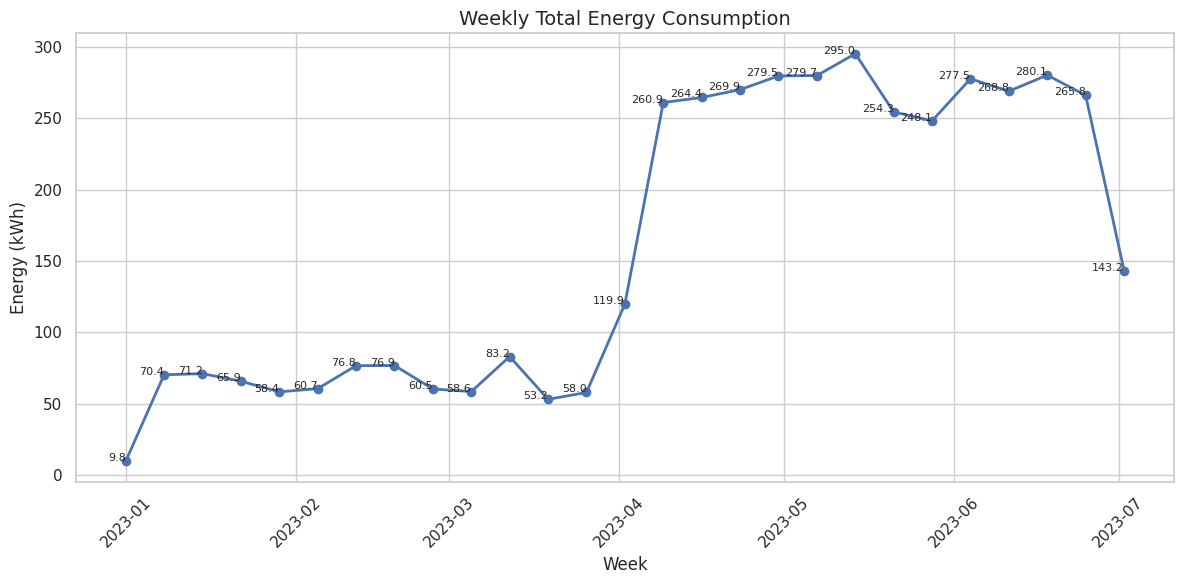

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(weekly.index, weekly['total_power'],
         marker='o', linestyle='-', linewidth=2)

plt.title("Weekly Total Energy Consumption", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)

plt.grid(True)
plt.xticks(rotation=45)

# Annotate each point
for i, value in enumerate(weekly['total_power']):
    plt.text(weekly.index[i], value,
             f"{value:.1f}", fontsize=8,
             ha='right')

plt.tight_layout()
plt.show()

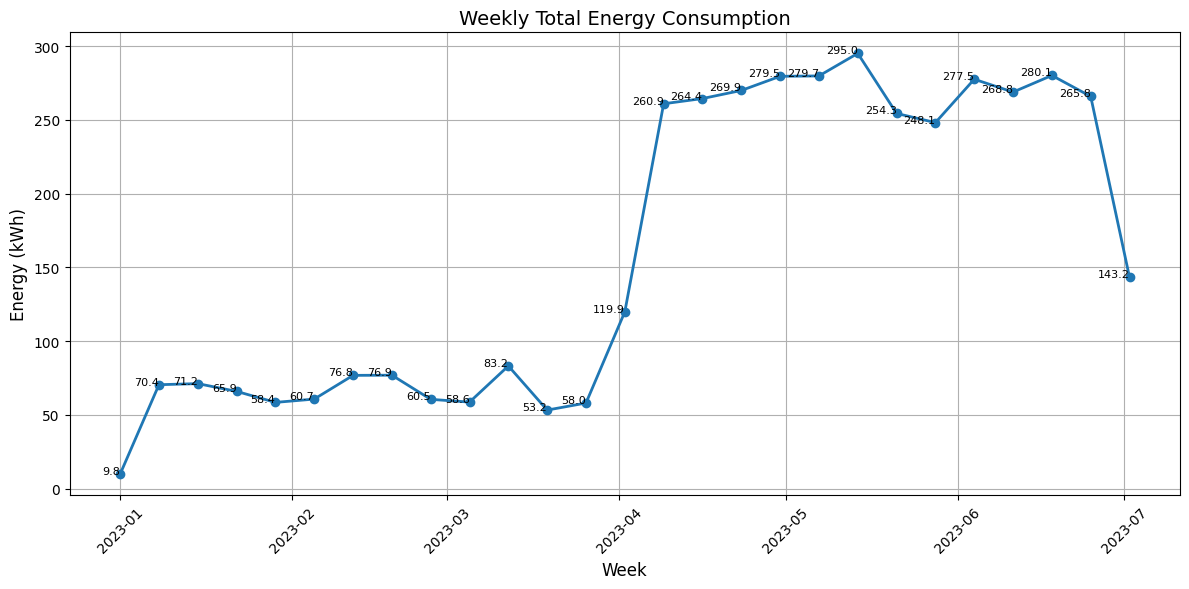

In [6]:
plt.figure(figsize=(12,6))

plt.plot(weekly.index, weekly['total_power'],
         marker='o', linestyle='-', linewidth=2)

plt.title("Weekly Total Energy Consumption", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)

plt.grid(True)
plt.xticks(rotation=45)

# Annotate each point
for i, value in enumerate(weekly['total_power']):
    plt.text(weekly.index[i], value,
             f"{value:.1f}", fontsize=8,
             ha='right')

plt.tight_layout()
plt.show()


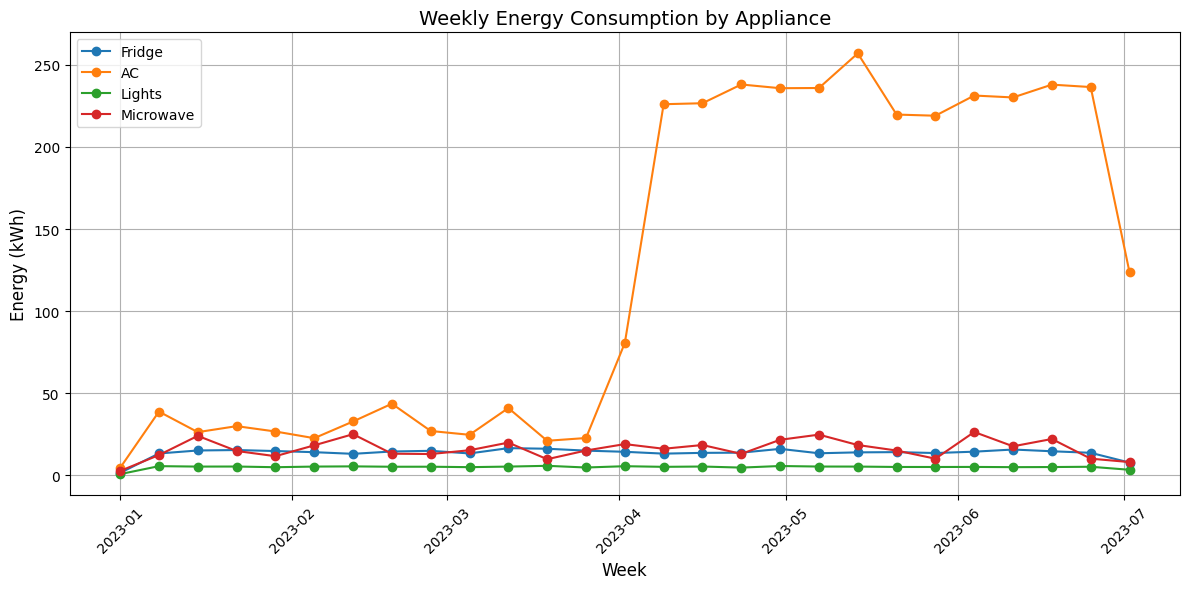

In [7]:
plt.figure(figsize=(12,6))

plt.plot(weekly.index, weekly['fridge'], marker='o', label='Fridge')
plt.plot(weekly.index, weekly['ac'], marker='o', label='AC')
plt.plot(weekly.index, weekly['lights'], marker='o', label='Lights')
plt.plot(weekly.index, weekly['microwave'], marker='o', label='Microwave')

plt.title("Weekly Energy Consumption by Appliance", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
sns.set(style="whitegrid")


/tmp/ipython-input-2897721226.py:51: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


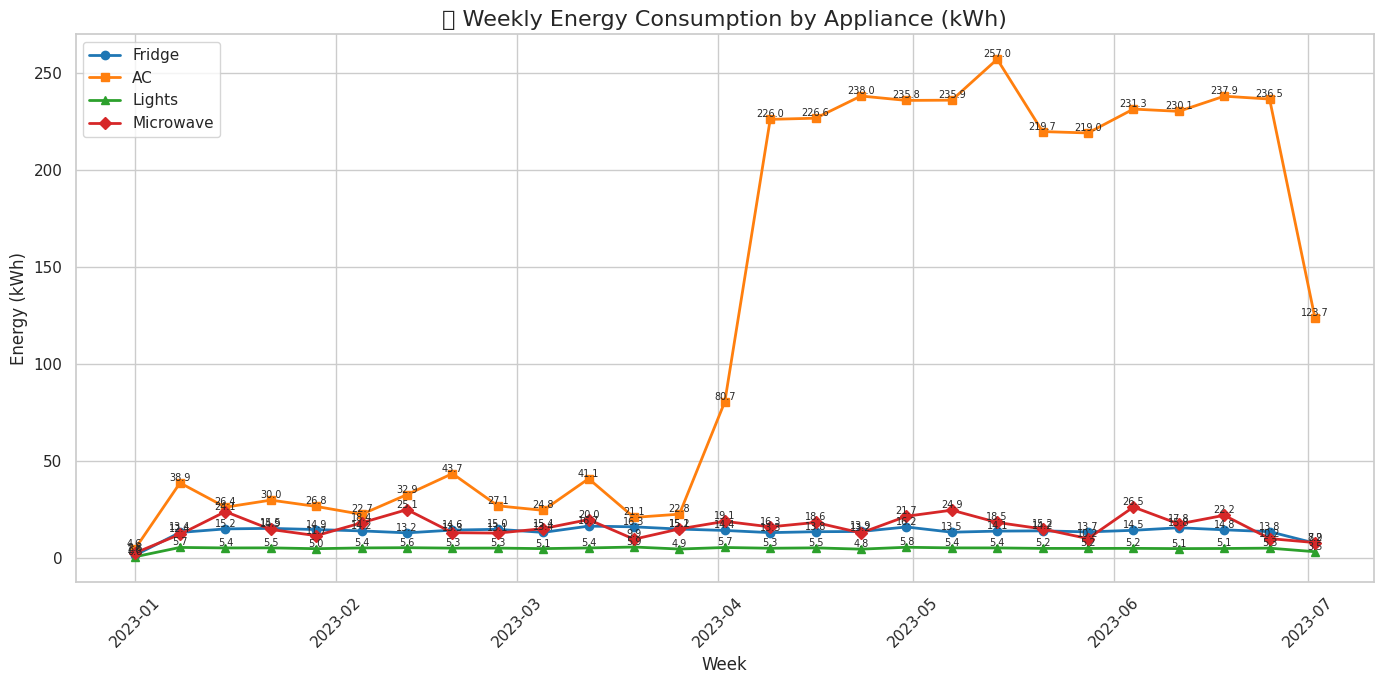

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Weekly energy (kWh)
weekly = df.resample('W').sum() / 1000

# Styling
sns.set(style="whitegrid")
plt.figure(figsize=(14,7))

# Plot each appliance with unique style
appliances = {
    "Fridge": ("fridge", "o", "#1f77b4"),
    "AC": ("ac", "s", "#ff7f0e"),
    "Lights": ("lights", "^", "#2ca02c"),
    "Microwave": ("microwave", "D", "#d62728")
}

for label, (col, marker, color) in appliances.items():
    plt.plot(
        weekly.index,
        weekly[col],
        marker=marker,
        markersize=6,
        linewidth=2,
        label=label,
        color=color
    )

    # Add value labels
    for x, y in zip(weekly.index, weekly[col]):
        plt.text(x, y, f"{y:.1f}", fontsize=7,
                 ha='center', va='bottom')

# Titles and labels
plt.title("✨ Weekly Energy Consumption by Appliance (kWh)", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
available_cols = ['fridge', 'microwave']
df['total_kitchen_power'] = df[available_cols].sum(axis=1)
df['High_Usage'] = df['total_kitchen_power'] > 1.0

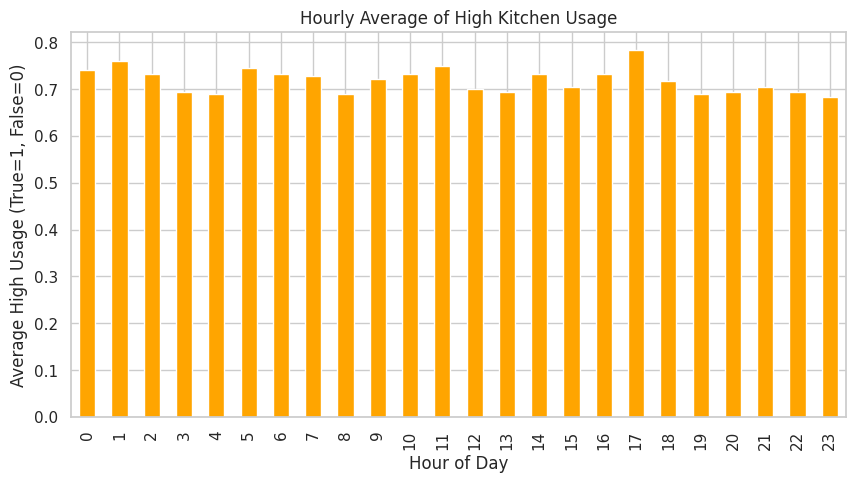

In [10]:
df['hour']=df.index.hour
hourly_status=df.groupby('hour')['High_Usage'].mean()
plt.figure(figsize=(10,5))
hourly_status.plot(kind='bar',color='orange')
plt.title('Hourly Average of High Kitchen Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Average High Usage (True=1, False=0)')
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
print("Imported seasonal_decompose and matplotlib.pyplot as plt.")

Imported seasonal_decompose and matplotlib.pyplot as plt.


In [16]:
decomposition = seasonal_decompose(weekly['total_power'], model='additive', period=4)
print("Time series decomposition performed.")

Time series decomposition performed.


In [19]:
import pandas as pd


df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")


df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
weekly = df.resample('W').sum() / 1000

decomposition = seasonal_decompose(weekly['total_power'], model='additive', period=4)
print("Time series decomposition performed.")

Time series decomposition performed.


In [22]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.seasonal import seasonal_decompose

def generate_data():
    print("Generating synthetic energy data...")

    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    month = df['timestamp'].dt.month
    ac_prob = np.where(month >= 4, 0.8, 0.1)
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.9, 0.1])
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']

    data_path = os.path.join("energy_consumption_project", "data", "raw", "energy_data.csv")
    os.makedirs(os.path.dirname(data_path), exist_ok=True)
    df.to_csv(data_path, index=False)
    print(f"Data saved to {data_path}")


generate_data()


df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")


df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)


weekly = df.resample('W').sum() / 1000

decomposition = seasonal_decompose(weekly['total_power'], model='additive', period=4)
print("Time series decomposition performed.")

Generating synthetic energy data...
Data saved to energy_consumption_project/data/raw/energy_data.csv
Time series decomposition performed.


/tmp/ipython-input-701468727.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


In [23]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.seasonal import seasonal_decompose

def generate_data():
    print("Generating synthetic energy data...")

    # Extend the date range to cover more than two years for decomposition
    date_rng = pd.date_range(start='1/1/2023', end='12/31/2024', freq='H')
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    month = df['timestamp'].dt.month
    ac_prob = np.where(month >= 4, 0.8, 0.1)
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.9, 0.1])
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']

    data_path = os.path.join("energy_consumption_project", "data", "raw", "energy_data.csv")
    os.makedirs(os.path.dirname(data_path), exist_ok=True)
    df.to_csv(data_path, index=False)
    print(f"Data saved to {data_path}")

# Ensure the data file exists by calling generate_data() first
generate_data()

# Load data
df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Convert to weekly energy (kWh)
weekly = df.resample('W').sum() / 1000  # Wh → kWh

decomposition = seasonal_decompose(weekly['total_power'], model='additive', period=52) # Assuming weekly data and a yearly seasonality (52 weeks)
print("Time series decomposition performed.")

Generating synthetic energy data...
Data saved to energy_consumption_project/data/raw/energy_data.csv
Time series decomposition performed.


/tmp/ipython-input-1268763138.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='12/31/2024', freq='H')


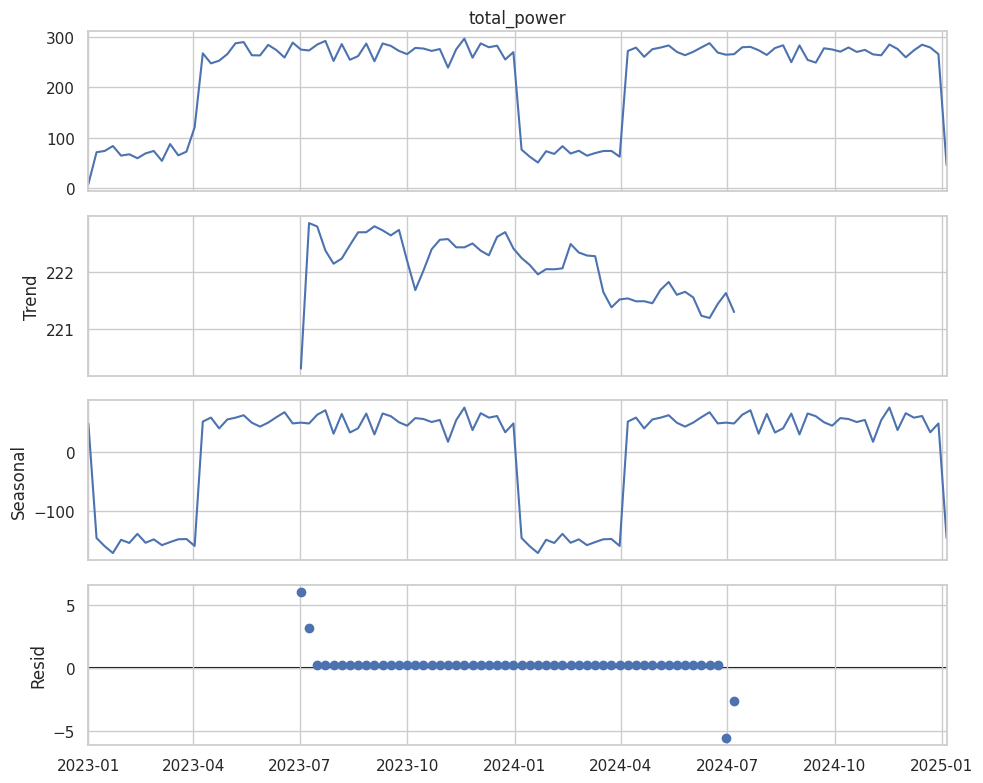

Decomposition components plotted.


In [24]:
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()
print("Decomposition components plotted.")

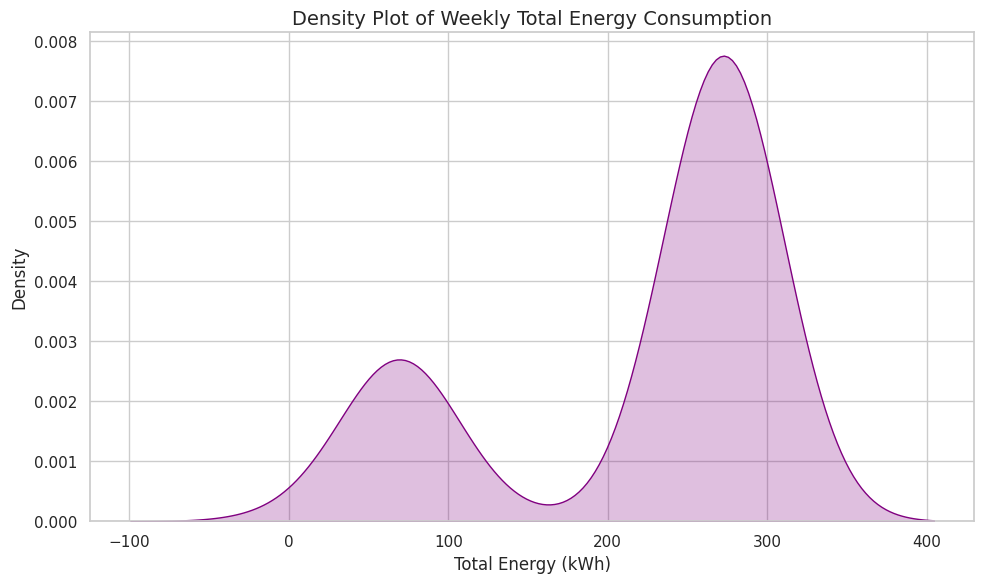

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(weekly['total_power'], fill=True, color='purple')
plt.title('Density Plot of Weekly Total Energy Consumption', fontsize=14)
plt.xlabel('Total Energy (kWh)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

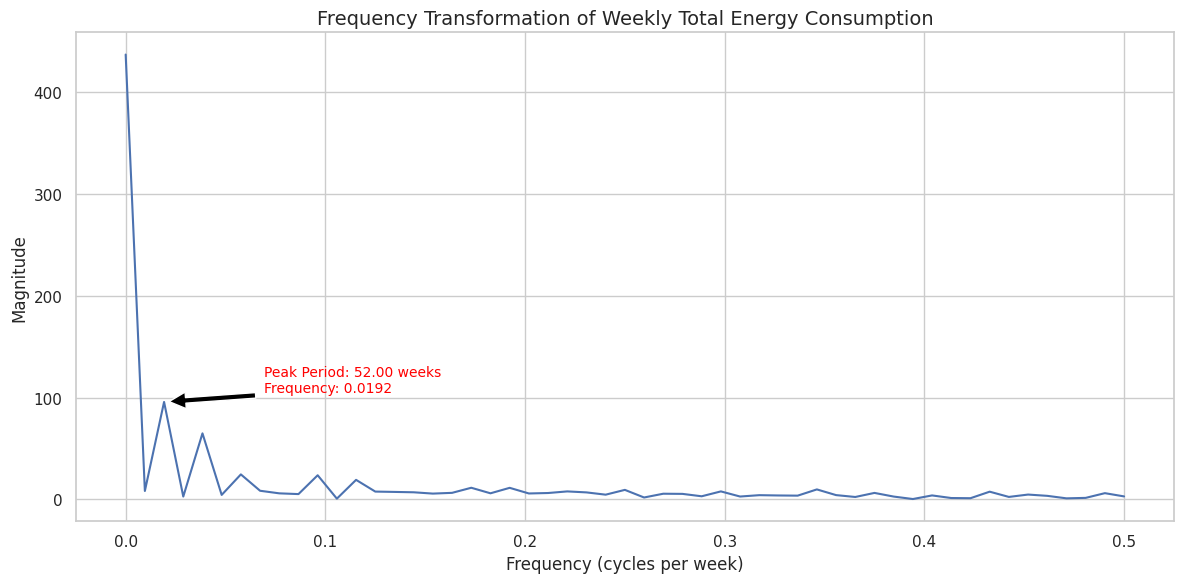

Frequency transformation plot generated with peak annotation.


In [27]:
import numpy as np
import matplotlib.pyplot as plt


data = weekly['total_power'].values


N = len(data)
T = 1.0
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = np.fft.fft(data)
xm = np.linspace(0.0, 1.0/(2.0*T), N//2)


magnitudes = 2.0/N * np.abs(yf[1:N//2])
frequencies = xm[1:N//2]

peak_frequency = 0
peak_period = np.inf

if len(magnitudes) > 0:
    peak_idx = np.argmax(magnitudes)
    peak_frequency = frequencies[peak_idx]
    peak_period = 1.0 / peak_frequency if peak_frequency != 0 else np.inf

plt.figure(figsize=(12, 6))
plt.plot(xm, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Frequency Transformation of Weekly Total Energy Consumption', fontsize=14)
plt.xlabel('Frequency (cycles per week)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid(True)


if peak_frequency != 0:

    peak_magnitude_idx = np.argmin(np.abs(xm - peak_frequency))
    peak_magnitude = 2.0/N * np.abs(yf[peak_magnitude_idx])

    plt.annotate(f'Peak Period: {peak_period:.2f} weeks\nFrequency: {peak_frequency:.4f}',
                 xy=(peak_frequency, peak_magnitude),
                 xytext=(peak_frequency + 0.05, peak_magnitude + 10),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10,
                 color='red')

plt.tight_layout()
plt.show()
print("Frequency transformation plot generated with peak annotation.")

In [29]:
import numpy as np


magnitudes = 2.0/N * np.abs(yf[1:N//2])
frequencies = xm[1:N//2]


if len(magnitudes) > 0:
    peak_idx = np.argmax(magnitudes)
    peak_frequency = frequencies[peak_idx]
    peak_period = 1.0 / peak_frequency if peak_frequency != 0 else np.inf

    print(f"The peak frequency (excluding DC) is: {peak_frequency:.4f} cycles per week")
    print(f"The corresponding peak period is: {peak_period:.2f} weeks")
else:
    print("Not enough data to determine a meaningful peak frequency and period.")

The peak frequency (excluding DC) is: 0.0192 cycles per week
The corresponding peak period is: 52.00 weeks
